In [2504]:
import pandas as pd

In [2505]:
df = pd.read_csv("C:\Data\my_phone.csv")

In [2506]:
df.describe()

C:\Users\daryn\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Unnamed: 0,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.00000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,2009.50000,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,672.843532,1116.360945,1.331126
std,1160.61837,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,404.404351,459.694423,0.940227
min,0.00000,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,240.000000,0.000000
25%,1004.75000,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,364.750000,739.000000,1.000000
50%,2009.50000,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,3014.25000,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,4019.00000,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [2507]:
'''Бачимо, що є колонка без назви. Середнє дорівнює чітко 1/2 від кількості, отже, схоже, що це поле - це просто унікальний ідентифікатор зі значеннями 0, 1, 2, ... Дамо назву цій колонці - id'''

'Бачимо, що є колонка без назви. Середнє дорівнює чітко 1/2 від кількості, отже, схоже, що це поле - це просто унікальний ідентифікатор зі значеннями 0, 1, 2, ... Дамо назву цій колонці - id'

In [2508]:
df.columns.values[0] = 'id'

In [2509]:
'''Але колонка id особливої користі не дає нам, тому потенційно її можна і видалити'''
df = df.drop('id', axis=1)

In [2510]:
'''Перевіримо, чи є пропущені значення у якійсь колонці'''
na_count = df.isna().sum()
print(na_count)

battery_power       0
bluetooth           0
weight              0
memory              0
n_cores             0
ram                 0
dual_sim            0
wifi                0
pixel_height        0
pixel_width         0
price_range      1000
dtype: int64


In [2511]:
'''У колонці price_range аж 1000 пропущених значень'''

'У колонці price_range аж 1000 пропущених значень'

In [2512]:
print(df.dtypes)

battery_power      int64
bluetooth         object
weight             int64
memory             int64
n_cores          float64
ram                int64
dual_sim          object
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object


In [2513]:
df.nunique()

battery_power    1295
bluetooth           2
weight            121
memory             63
n_cores             9
ram              2446
dual_sim            3
wifi                2
pixel_height     1417
pixel_width      1543
price_range         4
dtype: int64

In [2514]:
'''Для bluetooth, dual_sim та wifi повинно бути тільки по 2 унікальних значення, але у dual_sim чомусь їх 3'''

'Для bluetooth, dual_sim та wifi повинно бути тільки по 2 унікальних значення, але у dual_sim чомусь їх 3'

In [2515]:
invalid_values = df[(df['dual_sim'] != 0) & (df['dual_sim'] != 1)]

'''Дослідимо чому так'''
print(invalid_values[['dual_sim']])

     dual_sim
0           0
1           1
2           1
3           0
4           0
...       ...
4015        1
4016        0
4017        1
4018        1
4019        1

[4020 rows x 1 columns]


In [2516]:
invalid_values = df[(df['dual_sim'] != "0") & (df['dual_sim'] != "1")]
print(invalid_values[['dual_sim']])

    dual_sim
376       NO
378       NO
379       NO
381       NO
382       NO
384       NO
385       NO
386       NO
387       NO
388       NO
389       NO
391       NO
392       NO
393       NO
402       NO
404       NO
406       NO
408       NO
411       NO
413       NO
415       NO
416       NO
418       NO
419       NO
422       NO
423       NO
427       NO
428       NO
429       NO
432       NO
435       NO
438       NO
439       NO
441       NO
442       NO
446       NO
448       NO
451       NO
453       NO
454       NO
455       NO
457       NO
459       NO
461       NO


In [2517]:
'''Тепер зрозуміло, чому було 3 унікальних. Виправимо всі значення "NO" на 0'''

'Тепер зрозуміло, чому було 3 унікальних. Виправимо всі значення "NO" на 0'

In [2518]:
df['dual_sim'] = df['dual_sim'].replace("NO", "0")

In [2519]:
df.nunique()

battery_power    1295
bluetooth           2
weight            121
memory             63
n_cores             9
ram              2446
dual_sim            2
wifi                2
pixel_height     1417
pixel_width      1543
price_range         4
dtype: int64

In [2520]:
'''Тепер для булевих змінних по 2 унікальних значення. Але вони стрінгові для bluetooth та dual_sim, тому треба перетворити їх у числові.'''

'Тепер для булевих змінних по 2 унікальних значення. Але вони стрінгові для bluetooth та dual_sim, тому треба перетворити їх у числові.'

In [2521]:
df['bluetooth'] = df['bluetooth'].map({"YES": 1, "NO": 0})
df['dual_sim'] = df['dual_sim'].map({"1": 1, "0": 0})

In [2522]:
df

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,842,0,188,7,2.0,2549,0,1,20,756,1.0
1,1021,1,136,53,3.0,2631,1,0,905,1988,2.0
2,563,1,145,41,5.0,2603,1,0,1263,1716,2.0
3,615,1,131,10,6.0,2769,0,0,1216,1786,2.0
4,1821,1,141,44,2.0,1411,0,0,1208,1212,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4015,747,0,131,10,2.0,103,1,0,767,1024,1.0
4016,766,0,104,12,3.0,355,0,0,428,456,1.0
4017,839,0,112,9,1.0,408,1,1,1088,255,1.0
4018,809,0,123,7,2.0,112,1,0,365,1173,1.0


In [2452]:
print(df.dtypes)

battery_power      int64
bluetooth          int64
weight             int64
memory             int64
n_cores          float64
ram                int64
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object


In [2453]:
'''Бачимо, що булеві текстові ми перетворили в числові 0 та 1'''

'Бачимо, що булеві текстові ми перетворили в числові 0 та 1'

In [2454]:
'''Ще незрозуміло, чому n_cores має тип даних float. Кількість ядер у процесора завжди є цілим числом. І також price_range є float'''

'Ще незрозуміло, чому n_cores має тип даних float. Кількість ядер у процесора завжди є цілим числом. І також price_range є float'

In [2455]:
non_integer_values = df[df['n_cores'] % 1 != 0]

In [2456]:
non_integer_values

,battery_power,bluetooth,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
72,605,0,142,9,3.5,392,0,160,1026,0.0
76,1114,0,197,9,3.5,907,0,1040,1071,0.0
83,1008,0,114,61,3.5,2009,0,1077,1122,1.0
87,1083,1,178,64,3.5,3210,0,1025,1118,3.0
90,1724,0,177,57,3.5,2822,0,1605,1924,3.0
94,1322,0,140,7,3.5,1418,0,177,1990,1.0
95,1137,1,196,7,3.5,3616,1,942,1179,3.0
110,783,0,106,43,3.5,2016,0,1198,1471,1.0


In [2457]:
'''Можна або видалити ці значення, або написати 4. Звісно в реальних умовах я поставила б запитання команді, яка збирала ці дані. Округлимо все ж таки до 4 ядер.'''

'Можна або видалити ці значення, або написати 4. Звісно в реальних умовах я поставила б запитання команді, яка збирала ці дані. Округлимо все ж таки до 4 ядер.'

In [2458]:
df.loc[df['n_cores'] == 3.5, 'n_cores'] = 4

In [2459]:
print(df.dtypes)

battery_power      int64
bluetooth          int64
weight             int64
memory             int64
n_cores          float64
ram                int64
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object


In [2460]:
non_integer_values = df[df['n_cores'] % 1 != 0]
print(non_integer_values)

Empty DataFrame
Columns: [battery_power, bluetooth, weight, memory, n_cores, ram, wifi, pixel_height, pixel_width, price_range]
Index: []


In [2461]:
'''n_cores і price_range мають float тип даних, хоча це непипово, тому перетворимо їх на int'''

'n_cores і price_range мають float тип даних, хоча це непипово, тому перетворимо їх на int'

In [2462]:
print(df.dtypes)

battery_power      int64
bluetooth          int64
weight             int64
memory             int64
n_cores          float64
ram                int64
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object


In [2463]:
import numpy as np

In [2464]:
df['n_cores'] = df['n_cores'].round().astype(np.int64)
df['price_range'] = df['price_range'].apply(lambda x: int(x) if pd.notna(x) else np.nan)

In [2465]:
print(df.dtypes)

battery_power      int64
bluetooth          int64
weight             int64
memory             int64
n_cores            int64
ram                int64
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object


In [2466]:
data_with_emptyPrices = df[df['price_range'] % 1 != 0]
print(data_with_emptyPrices)
'''У price_range колонці залишилися пусті значення. Поки нічого з ними не робитимемо'''

      battery_power  bluetooth  weight  memory  n_cores   ram  wifi  \
2000           1043          1     193       5        3  3476     0   
2001            841          1     191      61        5  3895     0   
2002           1807          1     186      27        3  2396     1   
2003           1546          0      96      25        8  3893     0   
2004           1434          0     108      49        6  1773     1   
...             ...        ...     ...     ...      ...   ...   ...   
2995           1700          1     170      54        7  2121     0   
2996            609          0     186      13        4  1933     1   
2997           1185          0      80       8        1  1223     0   
2998           1533          1     171      50        2  2509     0   
2999           1270          1     140      35        6  2828     1   

      pixel_height  pixel_width  price_range  
2000           226         1412          NaN  
2001           746          857          NaN  
2002  

'У price_range колонці залишилися пусті значення. Поки нічого з ними не робитимемо'

In [2467]:
print(df.dtypes)

battery_power      int64
bluetooth          int64
weight             int64
memory             int64
n_cores            int64
ram                int64
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object


In [2468]:
'''Отже, нюанси, які були знайдені
1. Неназвана перша колонка, її видалення
2. У булевій за суттю змінній dual_sim було 3 унікальні значення
3. Були стрінгові значення для bluetooth і dual_sim
4. Ксть ядер float, а повинна бути ціле число
5. Перетворення всіх булевих за суттю значень (або категоріальних в іншому контексті) в 0 і 1'''

'Отже, нюанси, які були знайдені\n1. Неназвана перша колонка, її видалення\n2. У булевій за суттю змінній dual_sim було 3 унікальні значення\n3. Були стрінгові значення для bluetooth і dual_sim\n4. Ксть ядер float, а повинна бути ціле число\n5. Перетворення всіх булевих за суттю значень (або категоріальних в іншому контексті) в 0 і 1'

In [2469]:
'''Ще побудуємо графіки для дослідження даних'''

'Ще побудуємо графіки для дослідження даних'

In [2470]:
df.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,0.374627,139.426617,27.362438,3.964925,1715.922637,0.501990,672.843532,1116.360945,1.331126
std,425.790696,0.484087,33.675572,18.112879,2.220046,1184.300498,0.500058,404.404351,459.694423,0.940227
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,240.000000,0.000000
25%,780.750000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,364.750000,739.000000,1.000000
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [2471]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


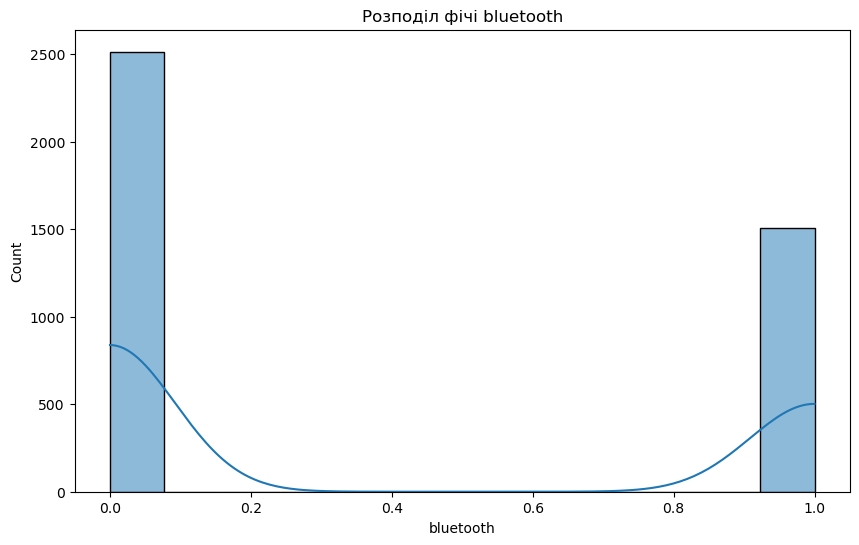

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


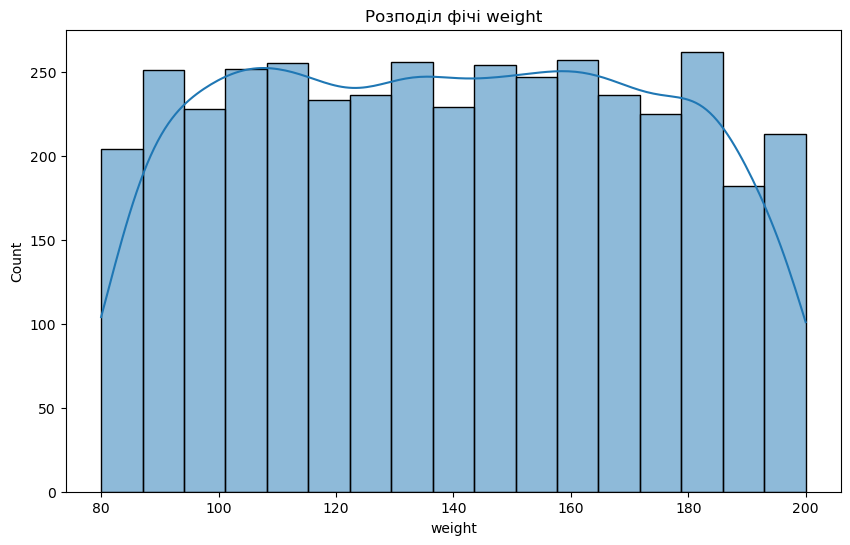

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


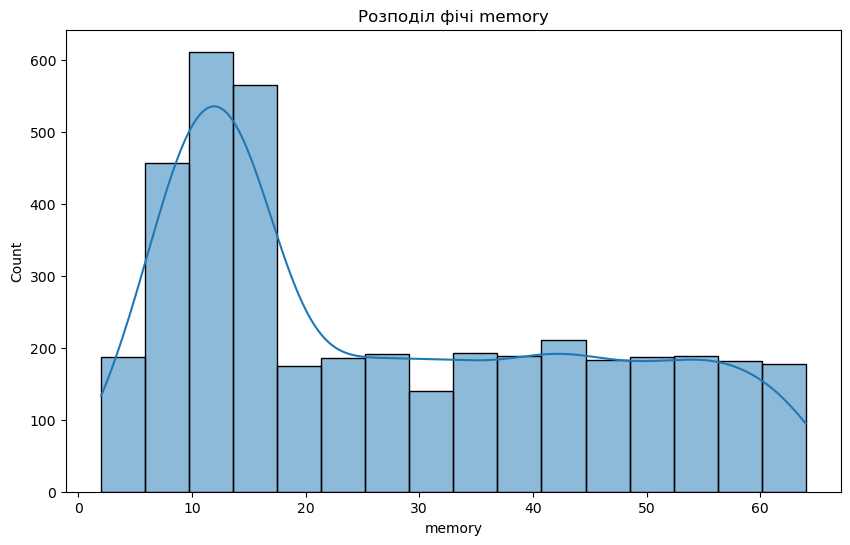

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


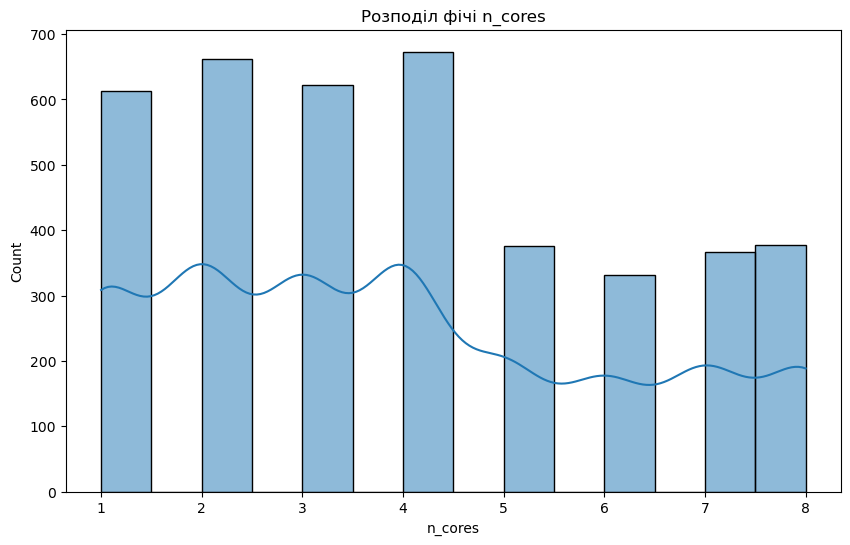

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


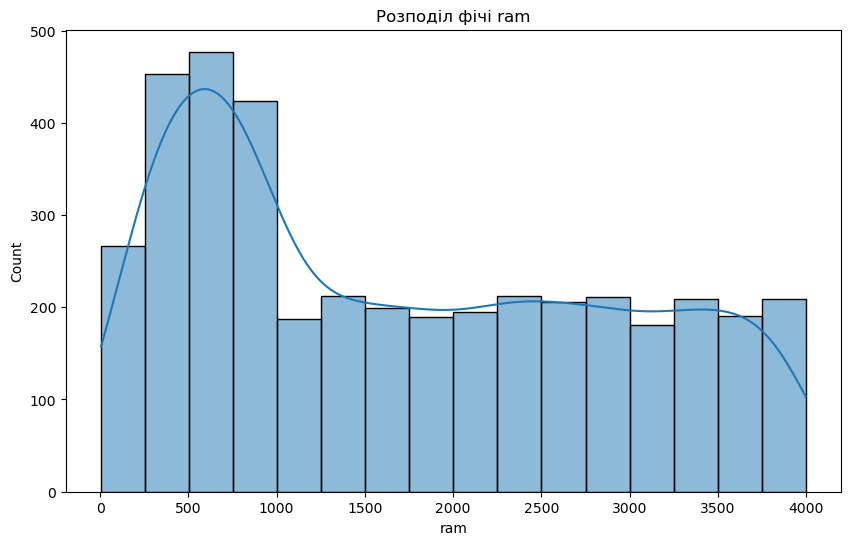

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


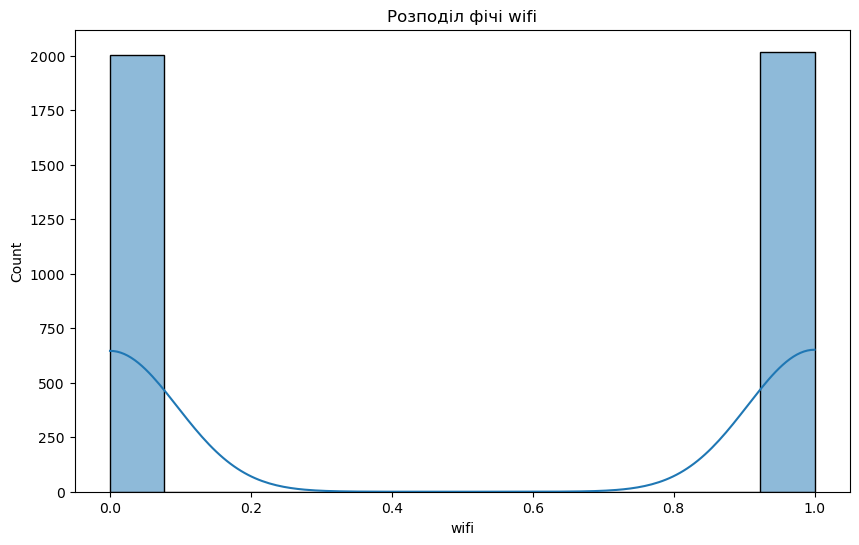

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


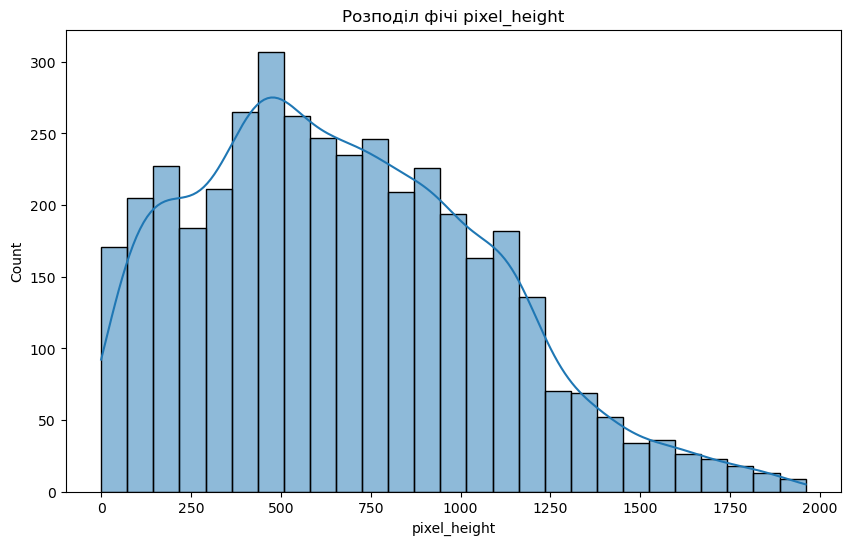

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


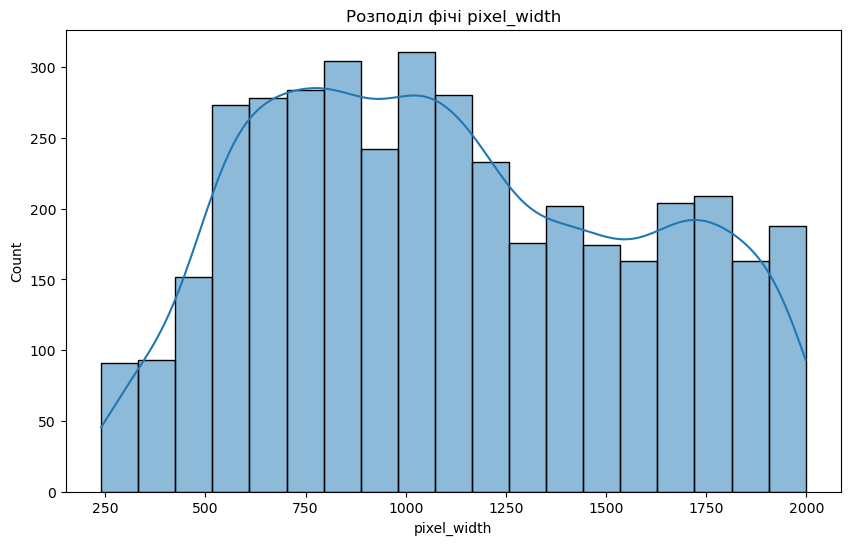

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


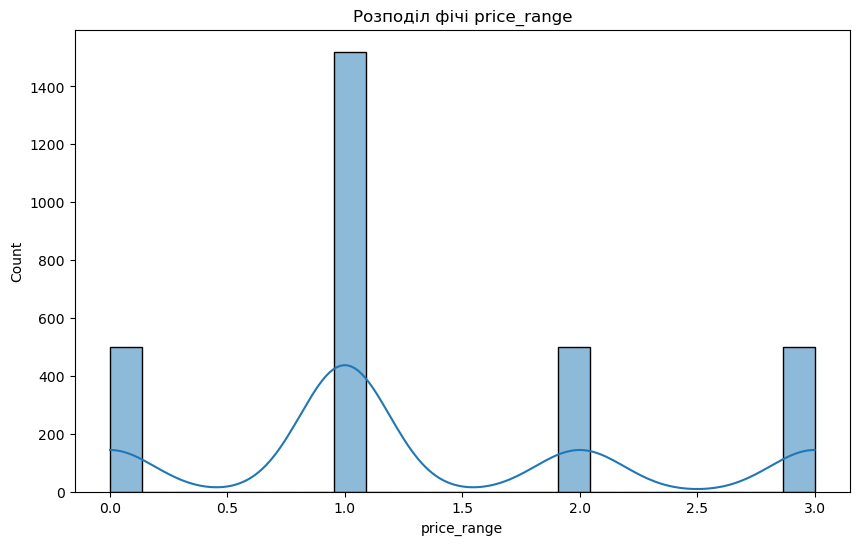

In [2472]:
df_selected = df.iloc[:, 1:]

for col in df_selected:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde = True)
    plt.title(f'Розподіл фічі {col}')
    plt.show()

In [2473]:
'''Якихось аномальних значень у жодному стовпці я не помічаю. Отже, можемо приступати до побудови моделі. Щодо енкодинга, то в даному випадку у нас вже є по суті label encoding і він нам підходить. Градації по price_range якраз підходять під використання label encoding'''

'Якихось аномальних значень у жодному стовпці я не помічаю. Отже, можемо приступати до побудови моделі. Щодо енкодинга, то в даному випадку у нас вже є по суті label encoding і він нам підходить. Градації по price_range якраз підходять під використання label encoding'

In [2474]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [2475]:
'''Розділимо df на тренувальну та тестову вибірки. Виберемо рядки, де ціна непуста. Також перетворимо значення price_range в int'''
train_data = df.dropna(subset=['price_range'])
train_data['price_range'] = train_data['price_range'].round().astype(np.int64)

C:\Users\daryn\AppData\Local\Temp\ipykernel_29836\3425815991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['price_range'] = train_data['price_range'].round().astype(np.int64)


In [2476]:
'''Вище ми вже відбирали дані, де ціна пуста. Видалимо price_range звідси'''
X_test = data_with_emptyPrices
X_test = X_test.drop('price_range', axis=1)

'''Також збережу тут у нові змінні такі значення, щоб у процесі запобігти якоїсь їх зміни'''
X_test_for_LogReg = X_test
X_empty_price_range_KMeans = X_test

In [2477]:
X_test

,battery_power,bluetooth,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width
2000,1043,1,193,5,3,3476,0,226,1412
2001,841,1,191,61,5,3895,0,746,857
2002,1807,1,186,27,3,2396,1,1270,1366
2003,1546,0,96,25,8,3893,0,295,1752
2004,1434,0,108,49,6,1773,1,749,810
...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7,2121,0,644,913
2996,609,0,186,13,4,1933,1,1152,1632
2997,1185,0,80,8,1,1223,0,477,825
2998,1533,1,171,50,2,2509,0,38,832


In [2478]:
train_data

,battery_power,bluetooth,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
0,842,0,188,7,2,2549,1,20,756,1
1,1021,1,136,53,3,2631,0,905,1988,2
2,563,1,145,41,5,2603,0,1263,1716,2
3,615,1,131,10,6,2769,0,1216,1786,2
4,1821,1,141,44,2,1411,0,1208,1212,1
...,...,...,...,...,...,...,...,...,...,...
4015,747,0,131,10,2,103,0,767,1024,1
4016,766,0,104,12,3,355,0,428,456,1
4017,839,0,112,9,1,408,1,1088,255,1
4018,809,0,123,7,2,112,0,365,1173,1


In [2479]:
'''Вибір незалежних та залежних змінних'''
X_train = train_data.drop('price_range', axis=1)
y_train = train_data['price_range'] 

'''Також збережу тут у нові змінні такі значення, щоб у процесі запобігти якоїсь їх зміни'''
X_train_for_LogReg = X_train
y_train_for_LogReg = y_train

X_for_KMeans = X_train

In [2480]:
'''Створення та навчання моделі'''
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [2481]:
'''Прогнозування для тестової вибірки'''
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred).astype(int)

In [2423]:
'''Обмежимо значення до 0, 1, 2, 3'''
y_pred_clipped = np.clip(y_pred_rounded, 0, 3)

In [2424]:
'''Обчислимо MSE'''
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

0.20258587631398425

In [2425]:
X_train

,battery_power,bluetooth,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width
0,842,0,188,7,2,2549,1,20,756
1,1021,1,136,53,3,2631,0,905,1988
2,563,1,145,41,5,2603,0,1263,1716
3,615,1,131,10,6,2769,0,1216,1786
4,1821,1,141,44,2,1411,0,1208,1212
...,...,...,...,...,...,...,...,...,...
4015,747,0,131,10,2,103,0,767,1024
4016,766,0,104,12,3,355,0,428,456
4017,839,0,112,9,1,408,1,1088,255
4018,809,0,123,7,2,112,0,365,1173


In [2426]:
y_pred_clipped

array([2, 3, 2, 3, 1, 2, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 2, 3, 2, 1, 2,
       1, 1, 3, 1, 2, 1, 3, 0, 2, 1, 2, 0, 1, 1, 3, 1, 2, 2, 1, 2, 0, 0,
       0, 1, 1, 3, 1, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 1, 3, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 2, 0, 2,
       2, 1, 2, 1, 2, 0, 3, 2, 1, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 1, 1,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 0, 1, 2, 1, 0, 1,
       1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 3, 1, 1, 2, 2,
       3, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 3,
       2, 2, 3, 1, 0, 1, 1, 3, 0, 2, 0, 2, 2, 1, 2, 1, 3, 1, 3, 1, 2, 0,
       0, 2, 1, 2, 2, 3, 2, 2, 3, 1, 0, 2, 2, 3, 2, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 1, 1, 2, 2, 2, 1, 3, 2, 0, 3, 1, 1, 2, 1, 0, 3, 2, 2,
       3, 2, 1, 3, 2, 2, 3, 2, 2, 1, 2, 1, 2, 3, 1,

In [2427]:
'''MSE = 0.2 - досить невисоке значення для діапазону 0-3''' 

'MSE = 0.2 - досить невисоке значення для діапазону 0-3'

In [2428]:
r_squared = r2_score(y_train, y_train_pred)

In [2429]:
r_squared

0.7707612622414315

In [2430]:
'''R2 ~ 0.8 - модель досить непогана''' 

'R2 ~ 0.8 - модель досить непогана'

In [2431]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2432]:
'''З побудови лінійної регресії у нас є готовий X_train та y_train'''
model = LogisticRegression()
model.fit(X_train_for_LogReg, y_train_for_LogReg)

C:\Users\daryn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [2273]:
y_pred = model.predict(X_test_for_LogReg)

In [2274]:
y_pred

array([2, 3, 1, 3, 2, 2, 3, 1, 3, 0, 3, 2, 0, 0, 1, 0, 1, 1, 2, 1, 1, 3,
       1, 3, 3, 1, 2, 0, 3, 0, 1, 1, 3, 1, 1, 0, 3, 2, 3, 3, 1, 1, 1, 0,
       0, 0, 1, 3, 0, 2, 3, 1, 2, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 0, 2,
       1, 3, 1, 1, 1, 2, 2, 2, 2, 0, 3, 0, 1, 3, 0, 3, 3, 0, 3, 1, 3, 1,
       3, 1, 2, 2, 2, 1, 2, 3, 0, 2, 2, 3, 3, 0, 1, 2, 2, 2, 1, 2, 3, 3,
       3, 2, 0, 3, 3, 2, 3, 0, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 0, 2,
       1, 1, 3, 2, 1, 0, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 1,
       1, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 3, 0, 3, 1, 3,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 1, 3, 1, 3, 1, 3, 1, 1, 0,
       0, 3, 0, 3, 2, 3, 1, 1, 3, 1, 0, 2, 2, 3, 1, 3, 2, 1, 3, 3, 1, 3,
       3, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 0, 3, 1, 2, 1, 1, 0, 3, 2, 2,
       3, 2, 1, 3, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1,

In [2275]:
X_test_for_LogReg

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width
2000,1043,1,193,5,3,3476,1,0,226,1412
2001,841,1,191,61,5,3895,1,0,746,857
2002,1807,1,186,27,3,2396,0,1,1270,1366
2003,1546,0,96,25,8,3893,1,0,295,1752
2004,1434,0,108,49,6,1773,0,1,749,810
...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7,2121,0,0,644,913
2996,609,0,186,13,4,1933,1,1,1152,1632
2997,1185,0,80,8,1,1223,0,0,477,825
2998,1533,1,171,50,2,2509,1,0,38,832


In [2276]:
X_test_for_LogReg

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width
2000,1043,1,193,5,3,3476,1,0,226,1412
2001,841,1,191,61,5,3895,1,0,746,857
2002,1807,1,186,27,3,2396,0,1,1270,1366
2003,1546,0,96,25,8,3893,1,0,295,1752
2004,1434,0,108,49,6,1773,0,1,749,810
...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7,2121,0,0,644,913
2996,609,0,186,13,4,1933,1,1,1152,1632
2997,1185,0,80,8,1,1223,0,0,477,825
2998,1533,1,171,50,2,2509,1,0,38,832


In [2277]:
'''Додаємо спрогнозовані значення до пропущених значень price_range в діапазоні індексів від 2000 до 2999'''
df.loc[2000:2999, 'price_range'] = y_pred
price_range_predicted = df
'''Перевірка результату'''
price_range_predicted.loc[2000:2999, 'price_range']
price_range_predicted

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,842,0,188,7,2,2549,0,1,20,756,1.0
1,1021,1,136,53,3,2631,1,0,905,1988,2.0
2,563,1,145,41,5,2603,1,0,1263,1716,2.0
3,615,1,131,10,6,2769,0,0,1216,1786,2.0
4,1821,1,141,44,2,1411,0,0,1208,1212,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4015,747,0,131,10,2,103,1,0,767,1024,1.0
4016,766,0,104,12,3,355,0,0,428,456,1.0
4017,839,0,112,9,1,408,1,1,1088,255,1.0
4018,809,0,123,7,2,112,1,0,365,1173,1.0


In [2278]:
'''Або якщо в умові малося на увазі отримати датасет тільки з тими 1000 прогнозними значеннями, то ось'''
df_with_predicted_data = X_test_for_LogReg
df_with_predicted_data['price_range_predicted'] = y_pred

df_with_predicted_data

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range_predicted
2000,1043,1,193,5,3,3476,1,0,226,1412,2
2001,841,1,191,61,5,3895,1,0,746,857,3
2002,1807,1,186,27,3,2396,0,1,1270,1366,1
2003,1546,0,96,25,8,3893,1,0,295,1752,3
2004,1434,0,108,49,6,1773,0,1,749,810,2
...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7,2121,0,0,644,913,1
2996,609,0,186,13,4,1933,1,1,1152,1632,1
2997,1185,0,80,8,1,1223,0,0,477,825,2
2998,1533,1,171,50,2,2509,1,0,38,832,2


In [2279]:
'''Оцінимо якість моделі'''
'''Треба відібрати 1000 значень у тестовій вибірці price_range, бо виникають помилки при знаходженні accuracy і при побудові classification_report'''
random_sample = y_train.sample(n=1000, random_state=42)
accuracy = accuracy_score(random_sample, y_pred)
class_report = classification_report(random_sample, y_pred)

In [2280]:
accuracy

0.252

In [2281]:
print(class_report)

              precision    recall  f1-score   support

           0       0.17      0.15      0.16       180
           1       0.47      0.30      0.37       491
           2       0.15      0.21      0.18       173
           3       0.14      0.26      0.18       156

    accuracy                           0.25      1000
   macro avg       0.23      0.23      0.22      1000
weighted avg       0.31      0.25      0.27      1000



In [2282]:
'''Модель правильно спрогнозувала тільки 25,2% даних, що є низьким показником'''

'Модель правильно спрогнозувала тільки 25,2% даних, що є низьким показником'

In [2283]:
'''Зрозуміло, що якість прогнозу в усіх рангів погана, але вона найкраща для 1-го рангу. 491 значень серед 1000 були спрогнозовані коректно'''

'Зрозуміло, що якість прогнозу в усіх рангів погана, але вона найкраща для 1-го рангу. 491 значень серед 1000 були спрогнозовані коректно'

In [2284]:
'''Думаю, що варто прибрати якісь колонки, і подивитися, чи стане модель кращою, Наприклад, приберемо dual_sim і вагу, бо це далеко не завжди показники дорожчого чи дешевшого гаджету. dual_sim було прибрано раніше, тому тільки вагу прибираємо'''

'Думаю, що варто прибрати якісь колонки, і подивитися, чи стане модель кращою, Наприклад, приберемо dual_sim і вагу, бо це далеко не завжди показники дорожчого чи дешевшого гаджету. dual_sim було прибрано раніше, тому тільки вагу прибираємо'

In [2285]:
df = df.drop('weight', axis=1)

'''Розділимо df на тренувальну та тестову вибірки. Також перетворимо значення price_range в int'''
train_data = df[df['price_range'].between(0, 3)]
train_data['price_range'] = train_data['price_range'].round().astype(np.int64)

test_data = df[df['price_range'].isna()]

'''Вибір незалежних та залежних змінних'''
X_train = train_data.drop('price_range', axis=1)  # Усі стовпці, окрім price_range
y_train = train_data['price_range']                 

X_test = test_data.drop('price_range', axis=1)     # Тестова вибірка (без price_range)

In [2286]:
model = LogisticRegression()
model.fit(X_train_for_LogReg, y_train_for_LogReg)
y_pred = model.predict(X_test_for_LogReg)

C:\Users\daryn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- price_range_predicted


In [2287]:
random_sample = y_train.sample(n=1000, random_state=42)
accuracy = accuracy_score(random_sample, y_pred)
class_report = classification_report(random_sample, y_pred)

In [2288]:
y_pred

array([2, 3, 1, 3, 2, 2, 3, 1, 3, 0, 3, 2, 0, 0, 1, 0, 1, 1, 2, 1, 1, 3,
       1, 3, 3, 1, 2, 0, 3, 0, 1, 1, 3, 1, 1, 0, 3, 2, 3, 3, 1, 1, 1, 0,
       0, 0, 1, 3, 0, 2, 3, 1, 2, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 0, 2,
       1, 3, 1, 1, 1, 2, 2, 2, 2, 0, 3, 0, 1, 3, 0, 3, 3, 0, 3, 1, 3, 1,
       3, 1, 2, 2, 2, 1, 2, 3, 0, 2, 2, 3, 3, 0, 1, 2, 2, 2, 1, 2, 3, 3,
       3, 2, 0, 3, 3, 2, 3, 0, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 0, 2,
       1, 1, 3, 2, 1, 0, 3, 2, 2, 2, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 1,
       1, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 3, 0, 3, 1, 3,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 1, 3, 1, 3, 1, 3, 1, 1, 0,
       0, 3, 0, 3, 2, 3, 1, 1, 3, 1, 0, 2, 2, 3, 1, 3, 2, 1, 3, 3, 1, 3,
       3, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 0, 3, 1, 2, 1, 1, 0, 3, 2, 2,
       3, 2, 1, 3, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1,

In [2289]:
accuracy

0.268

In [2290]:
'''Точність, на жаль, тільки погіршала'''

'Точність, на жаль, тільки погіршала'

In [2291]:
print(class_report)

              precision    recall  f1-score   support

           0       0.18      0.16      0.17       177
           1       0.48      0.34      0.40       446
           2       0.18      0.23      0.20       184
           3       0.16      0.24      0.19       193

    accuracy                           0.27      1000
   macro avg       0.25      0.24      0.24      1000
weighted avg       0.31      0.27      0.28      1000



In [2292]:
'''Переходимо до побудови моделі кластеризації методом K-means'''

'Переходимо до побудови моделі кластеризації методом K-means'

In [2293]:
X_for_KMeans

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width
0,842,0,188,7,2,2549,0,1,20,756
1,1021,1,136,53,3,2631,1,0,905,1988
2,563,1,145,41,5,2603,1,0,1263,1716
3,615,1,131,10,6,2769,0,0,1216,1786
4,1821,1,141,44,2,1411,0,0,1208,1212
...,...,...,...,...,...,...,...,...,...,...
4015,747,0,131,10,2,103,1,0,767,1024
4016,766,0,104,12,3,355,0,0,428,456
4017,839,0,112,9,1,408,1,1,1088,255
4018,809,0,123,7,2,112,1,0,365,1173


In [2294]:
X_empty_price_range_KMeans

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range_predicted
2000,1043,1,193,5,3,3476,1,0,226,1412,2
2001,841,1,191,61,5,3895,1,0,746,857,3
2002,1807,1,186,27,3,2396,0,1,1270,1366,1
2003,1546,0,96,25,8,3893,1,0,295,1752,3
2004,1434,0,108,49,6,1773,0,1,749,810,2
...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7,2121,0,0,644,913,1
2996,609,0,186,13,4,1933,1,1,1152,1632,1
2997,1185,0,80,8,1,1223,0,0,477,825,2
2998,1533,1,171,50,2,2509,1,0,38,832,2


In [2295]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 2, random_state = 42)

kmeans.fit(X_for_KMeans)

C:\Users\daryn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [2296]:
X_for_KMeans

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width
0,842,0,188,7,2,2549,0,1,20,756
1,1021,1,136,53,3,2631,1,0,905,1988
2,563,1,145,41,5,2603,1,0,1263,1716
3,615,1,131,10,6,2769,0,0,1216,1786
4,1821,1,141,44,2,1411,0,0,1208,1212
...,...,...,...,...,...,...,...,...,...,...
4015,747,0,131,10,2,103,1,0,767,1024
4016,766,0,104,12,3,355,0,0,428,456
4017,839,0,112,9,1,408,1,1,1088,255
4018,809,0,123,7,2,112,1,0,365,1173


In [2297]:
'''Для оцінки моделі використаємо Silhouette Score'''

X_for_KMeans['Cluster'] = kmeans.labels_
silhouette_avg = silhouette_score(X_for_KMeans, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5012474480817337


In [2298]:
X_empty_price_range_KMeans

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range_predicted
2000,1043,1,193,5,3,3476,1,0,226,1412,2
2001,841,1,191,61,5,3895,1,0,746,857,3
2002,1807,1,186,27,3,2396,0,1,1270,1366,1
2003,1546,0,96,25,8,3893,1,0,295,1752,3
2004,1434,0,108,49,6,1773,0,1,749,810,2
...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7,2121,0,0,644,913,1
2996,609,0,186,13,4,1933,1,1,1152,1632,1
2997,1185,0,80,8,1,1223,0,0,477,825,2
2998,1533,1,171,50,2,2509,1,0,38,832,2


In [2299]:
'''При 2 кл - 0.5, при 3 - 0,4, і далі тільки гіршає. Отже, залишаємо оптимальну ксть кластерів  - 2. 0.5 - об'єкт класифікований досить непогано, звісно, це не дуже близько до 1, але принаймні цей показник кращий за всі інші'''


"При 2 кл - 0.5, при 3 - 0,4, і далі тільки гіршає. Отже, залишаємо оптимальну ксть кластерів  - 2. 0.5 - об'єкт класифікований досить непогано, звісно, це не дуже близько до 1, але принаймні цей показник кращий за всі інші"

In [2300]:
predicted_clusters  = kmeans.predict(X_empty_price_range_KMeans)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- price_range_predicted


In [2301]:
predicted_clusters

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [2302]:
df_with_predicted_clusters = X_empty_price_range_KMeans
df_with_predicted_clusters['cluster_suggested'] = predicted_clusters

df_with_predicted_clusters

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range_predicted,cluster_suggested
2000,1043,1,193,5,3,3476,1,0,226,1412,2,0
2001,841,1,191,61,5,3895,1,0,746,857,3,0
2002,1807,1,186,27,3,2396,0,1,1270,1366,1,0
2003,1546,0,96,25,8,3893,1,0,295,1752,3,0
2004,1434,0,108,49,6,1773,0,1,749,810,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,170,54,7,2121,0,0,644,913,1,0
2996,609,0,186,13,4,1933,1,1,1152,1632,1,0
2997,1185,0,80,8,1,1223,0,0,477,825,2,1
2998,1533,1,171,50,2,2509,1,0,38,832,2,0
